# Step 1: Import Libraries and Load the dataset
    
Import necessary libraries for data manipulation, visualization, and machine learning.

Read the breast cancer dataset into a DataFrame.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\breast-cancer.csv")

# Step 2: Data Exploration

Display the first few rows of the dataset.

Check the shape of the dataset.

Check for missing values in the dataset.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Step 3: Target Distribution

Check the distribution of the target variable (**diagnosis**).

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df['diagnosis'].value_counts()*100/len(df)

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

# Step 4: Exploratory data analysis (EDA)

Use seaborn and matplotlib to visualize relationships between features and the target variable.

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

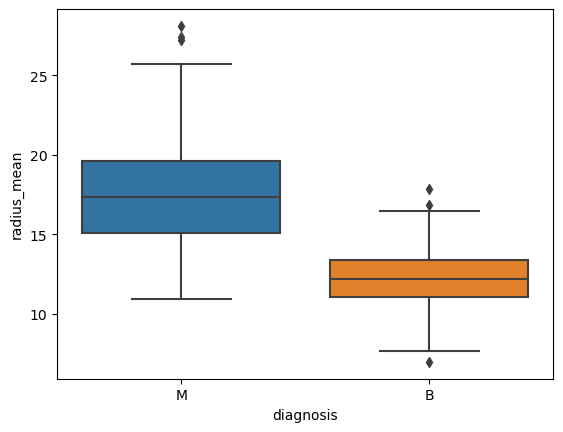

In [9]:
sns.boxplot(x='diagnosis',y='radius_mean',data=df)

<Axes: xlabel='diagnosis', ylabel='area_worst'>

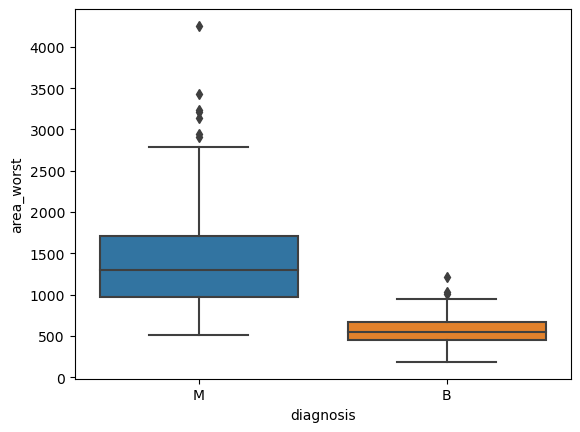

In [10]:
sns.boxplot(x='diagnosis',y='area_worst',data=df)

<Axes: xlabel='area_worst', ylabel='radius_mean'>

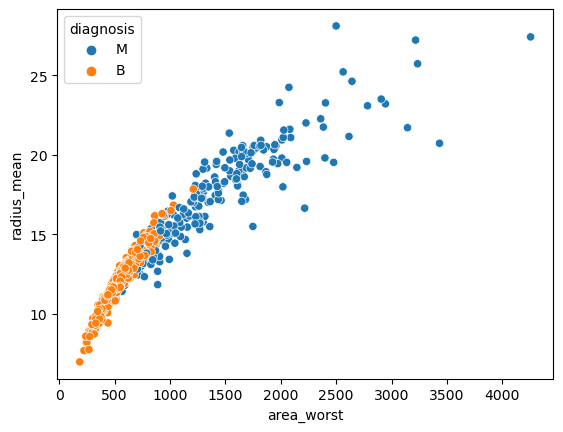

In [12]:
sns.scatterplot(y='radius_mean',x='area_worst',data=df,hue='diagnosis')

<Axes: xlabel='concavity_mean', ylabel='area_se'>

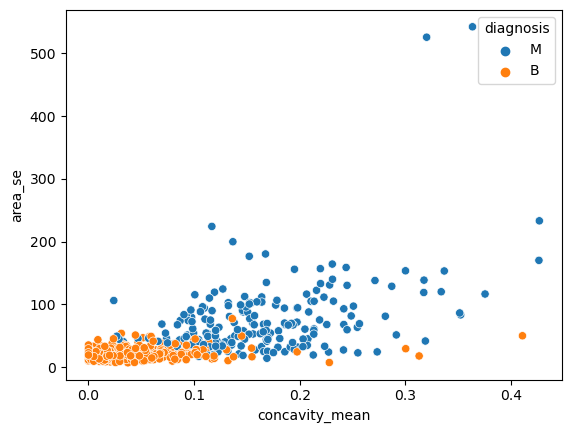

In [14]:
sns.scatterplot(x='concavity_mean',y='area_se',data=df,hue='diagnosis')

<Axes: xlabel='fractal_dimension_se', ylabel='fractal_dimension_worst'>

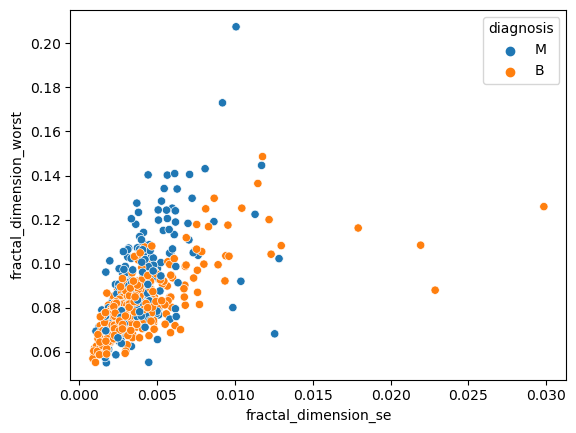

In [16]:
sns.scatterplot(x='fractal_dimension_se',y='fractal_dimension_worst',data=df,hue='diagnosis')

In [17]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Step 5: Data Preparation

Separate the features (x) from the target (y).

Convert the target variable to binary values (M -> 1, B -> 0).

In [18]:
x = df.drop(['id', 'diagnosis'],axis=1)
y = df.diagnosis

In [19]:
y = np.where(y == 'M',1,0)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# Step 6: Train-Test Split

Split the data into training and test sets.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Step 7: Model Training

Train a logistic regression model on the training data.

In [24]:
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

# Step 8: Model Prediction

Use the trained model to make predictions on the training and test sets.

In [25]:
model.predict(x_train) # Model will predict 1 & 0 and 50% Threshold

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [27]:
model.predict_proba(x_train)[:,1] ## Predict the Probabilities (Num X_train, 2)

array([9.97855360e-01, 9.96181421e-01, 9.79865983e-07, 8.20204196e-04,
       1.37875729e-04, 8.61355207e-03, 1.71741300e-02, 9.99895193e-01,
       9.99995719e-01, 4.39289346e-03, 1.70207890e-02, 1.00000000e+00,
       9.99715065e-01, 5.60452068e-01, 1.00000000e+00, 9.99999996e-01,
       2.55584669e-02, 2.47385105e-02, 1.58669439e-03, 9.99999997e-01,
       7.19761321e-06, 9.96390900e-01, 9.93914451e-01, 1.41640593e-01,
       5.21765185e-03, 7.23145508e-01, 9.02589662e-01, 9.98891347e-01,
       2.62547524e-03, 9.99874453e-01, 1.83468942e-01, 9.99004074e-01,
       2.41268845e-05, 1.39732504e-03, 3.69580867e-04, 9.99999232e-01,
       7.14429546e-03, 5.11576133e-04, 2.35899941e-01, 1.92477407e-01,
       7.42675720e-02, 1.29318649e-03, 9.64453941e-02, 4.34550589e-02,
       1.18333461e-02, 3.64496953e-05, 1.59368234e-03, 2.38990567e-03,
       5.53794269e-02, 7.53914692e-01, 3.13278253e-03, 3.45059363e-02,
       9.99990931e-01, 9.99998552e-01, 9.99968089e-01, 2.71362241e-03,
      

# Step 9: Model Evaluation

Evaluate the model using various metrics like precision, recall, and classification reports on both the training and test sets.

In [28]:
trainPred = model.predict(x_train)
trainProba = model.predict_proba(x_train)[:,1]
testPred = model.predict(x_test)
testProba = model.predict_proba(x_test)[:,1]

In [29]:
trainprecision = precision_score(y_train,trainPred)
testprecision = precision_score(y_test,testPred)

In [31]:
print(f"Train Precision : {trainprecision}")
print(f"Test Precision : {testprecision}")

Train Precision : 0.9470588235294117
Test Precision : 0.9736842105263158


In [32]:
Trainrecall = recall_score(y_train,trainPred)
Testrecall = recall_score(y_test,testPred)

print(f"Train Recall : {Trainrecall}")
print(f"Test Recall : {Testrecall}")

Train Recall : 0.9470588235294117
Test Recall : 0.8809523809523809


In [34]:
print(classification_report(y_train,trainPred)) # Print detailed level report for classification

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       285
           1       0.95      0.95      0.95       170

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [35]:
print(classification_report(y_test,testPred)) # Print detailed level report for classification

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# Step 10: Performance Visualization

Plot the ROC curve for both the training and test sets to visualize the model's performance.

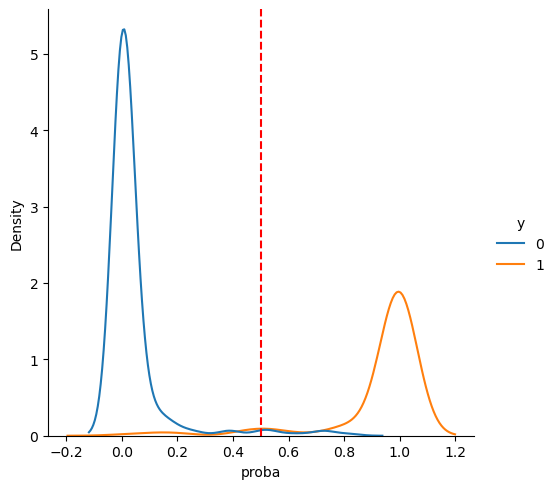

In [40]:
temp = pd.DataFrame()
temp['y'] = y_train
temp['proba'] = trainProba
sns.displot(x='proba',kind='kde',data=temp,hue='y')
plt.axvline(x=0.5,linestyle='--',color='red')

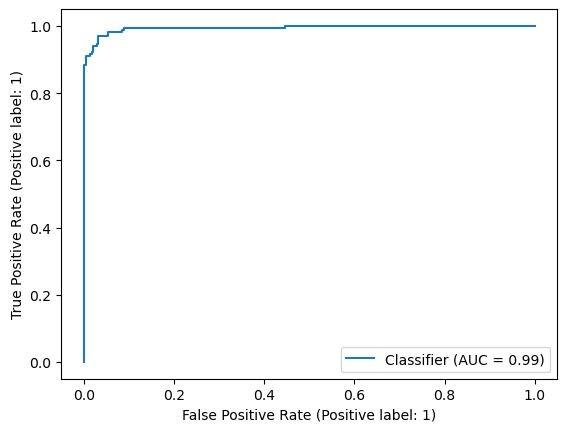

In [41]:
RocCurveDisplay.from_predictions(y_train,trainProba)

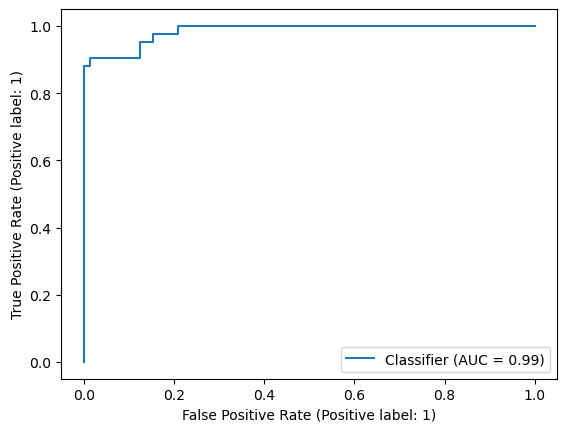

In [42]:
RocCurveDisplay.from_predictions(y_test,testProba)